In [7]:
import pandas as pd
import numpy as np
from display_acp import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv("../Linear_regression_projet/data.csv")

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Traitement des données

In [10]:
df["date"] = pd.to_datetime(df["date"])
df["renovation"] = df["date"].dt.year - df['yr_built']
df['renovation'][df['yr_renovated'] != 0] = df["date"].dt.year - df["yr_renovated"]
df['renovation'][df['renovation'] < 0] = 0
df["date"] = (df["date"] - df["date"].min()).dt.days
df["ln_price"] = np.log(df["price"])
df["bathrooms"] -= 0.01
df["bath_or_shower"] = round(df["bathrooms"])
df["toilet"] = np.ceil(df["bathrooms"])
df = df[df["bedrooms"]<20] # 1 valeur abérante avec 30 chambres
df = df[df["price"] != 7700000] #Valeur dégradant le modèle

C:\Users\boure\AppData\Local\Temp/ipykernel_9968/785307995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovation'][df['yr_renovated'] != 0] = df["date"].dt.year - df["yr_renovated"]
C:\Users\boure\AppData\Local\Temp/ipykernel_9968/785307995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovation'][df['renovation'] < 0] = 0


## Standardisation des données

In [11]:
X = df.drop(["id","yr_renovated","yr_built", "bathrooms"], axis=1)
X_reg = df.drop(["price", "ln_price", "id","yr_renovated","yr_built", "bathrooms"], axis=1)

In [12]:
X_scaled = StandardScaler().fit_transform(X)

## Modèle

In [17]:
pca = PCA(n_components=0.99)
projection = pca.fit_transform(X_scaled)

In [14]:
table = pd.DataFrame(projection, index=X.index, columns=["F"+str(i+1) for i in range(8)])
table

,F1,F2,F3,F4,F5,F6,F7,F8
0,-3.386514,0.154422,-0.277633,0.681052,0.028775,0.625549,0.200999,-0.024625
1,0.380697,0.448199,-1.327698,0.905275,-0.667195,0.946934,-0.220399,0.227637
2,-3.528874,-0.322981,0.460335,0.710619,-0.244691,-1.333225,-1.296577,1.130230
3,-0.406361,2.347501,0.346952,-2.099351,-0.270772,1.221348,-0.064325,-1.054601
4,-0.421796,-0.736914,-0.146525,0.414136,-0.159003,-0.719568,-1.181753,0.940058
...,...,...,...,...,...,...,...,...
21608,-0.050743,-0.758595,-2.538619,1.452405,-0.364081,0.860581,1.808401,-0.274276
21609,0.533114,-0.575374,-1.650518,0.593504,0.142668,1.743097,-0.696185,-0.959226
21610,-2.645382,-0.298343,-1.480204,1.905468,-0.053310,0.211351,1.328785,0.356337
21611,-0.044911,-1.897161,-1.087402,0.235363,0.482699,-0.239148,-0.637929,0.372327


### Eboulis des valeurs propres

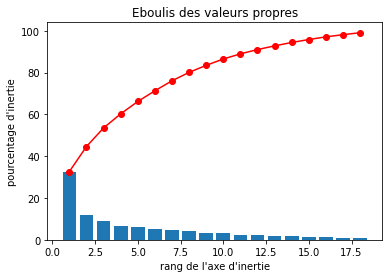

In [23]:
display_scree_plot(pca)

Pour garder 99% d'inertie, on a donc besoin de 18 colonnes dans ce cas

### Cercles des corrélations

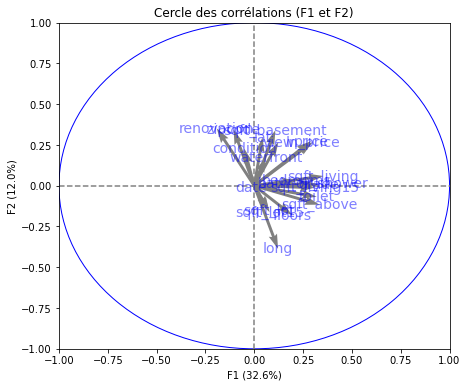

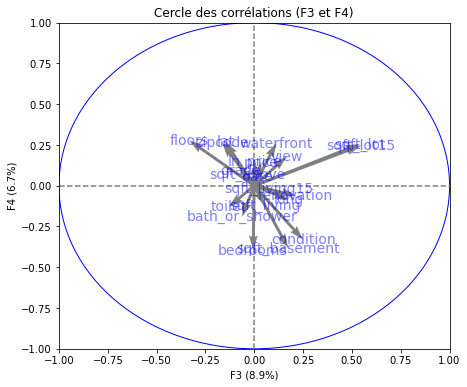

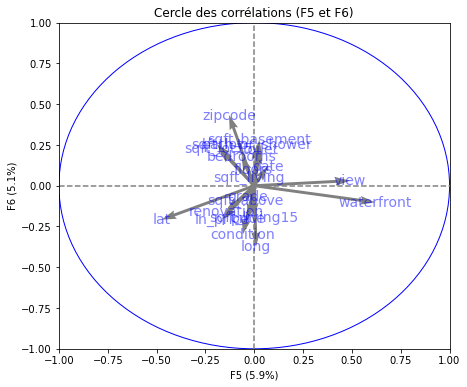

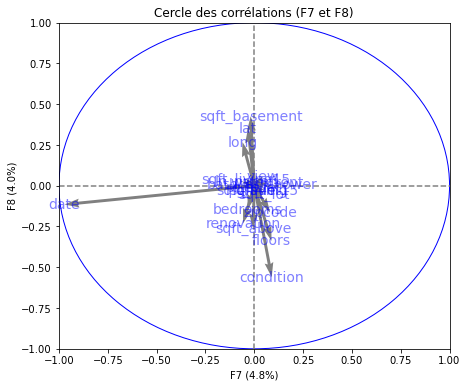

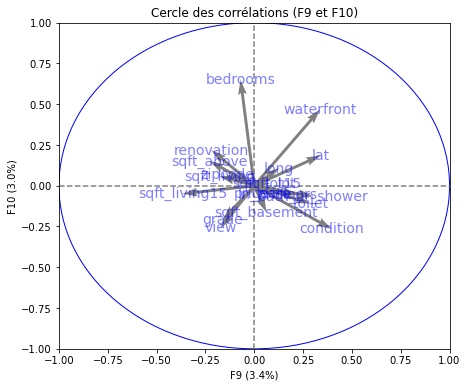

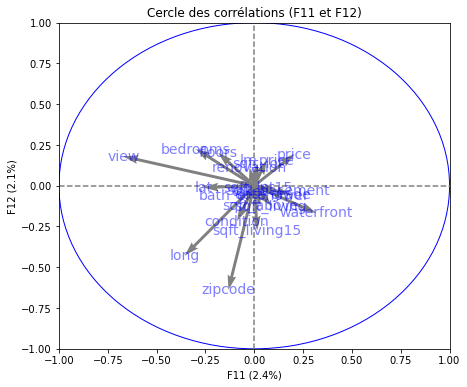

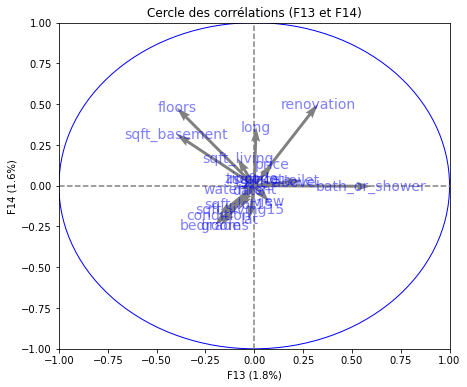

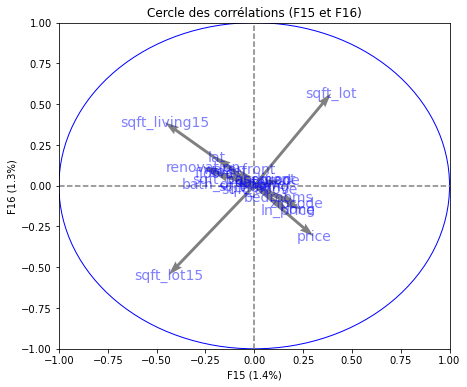

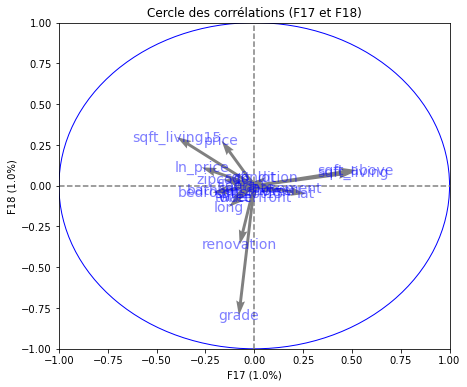

In [29]:
display_circles(pca.components_, 18, pca, [(0,1),(2,3),(4,5),(6,7),(8,9),(10,11),(12,13),(14,15),(16,17)], labels=X.columns)

### Projections

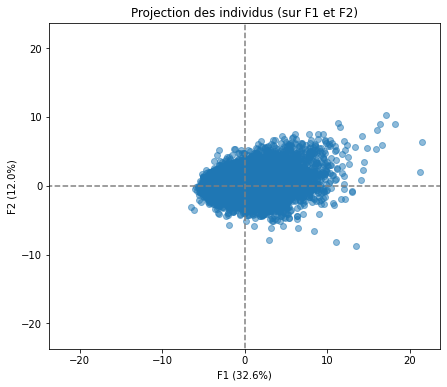

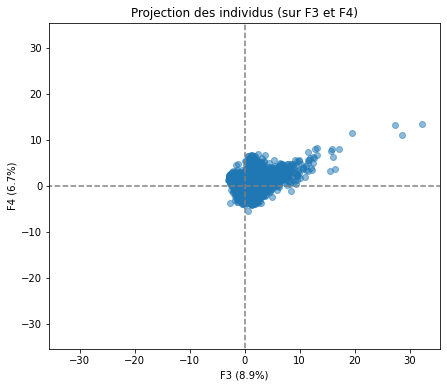

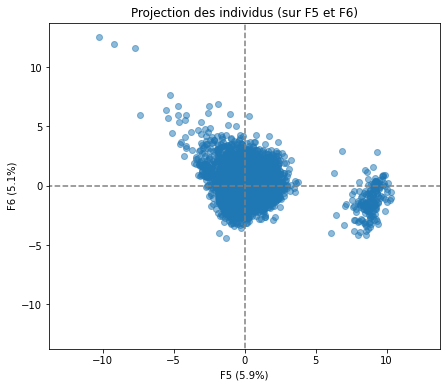

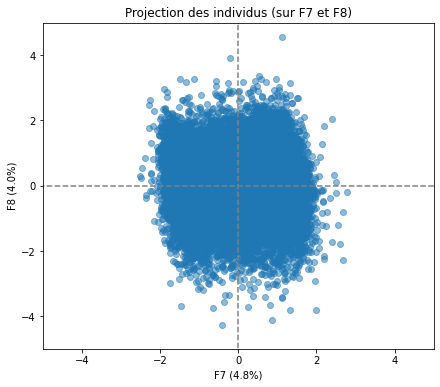

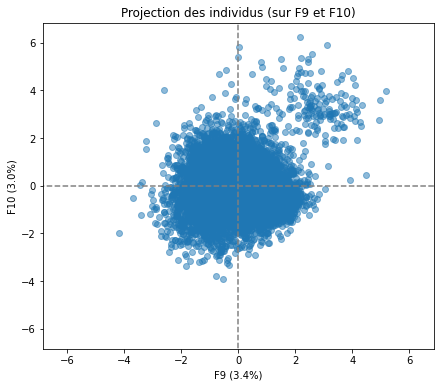

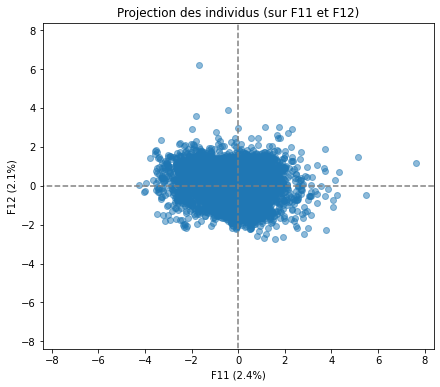

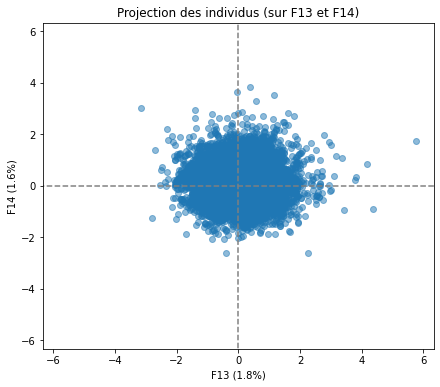

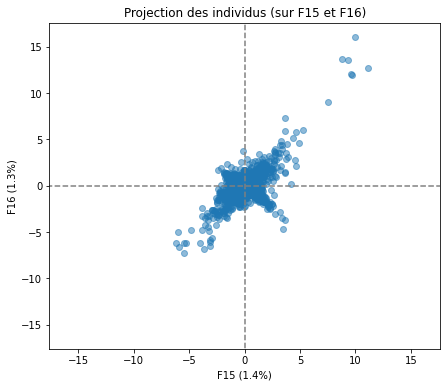

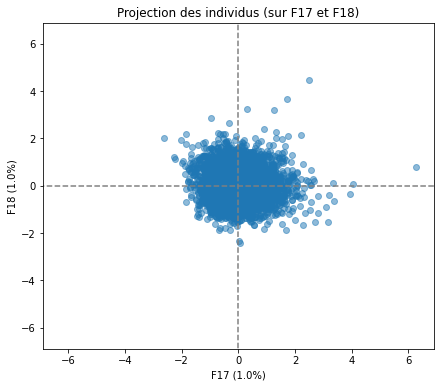

In [28]:
display_factorial_planes(projection, 18, pca, [(0,1),(2,3),(4,5),(6,7),(8,9),(10,11),(12,13),(14,15),(16,17)], alpha = 0.5)

## Polynomial featuring

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [32]:
features = X_reg.columns
pipeline = make_pipeline(PolynomialFeatures(2), StandardScaler())

processor = make_column_transformer((pipeline, features))

In [43]:
model = make_pipeline(processor, PCA(n_components=0.999), LinearRegression())

Train test split

In [36]:
from sklearn.model_selection import train_test_split, learning_curve

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, df["ln_price"], test_size=0.2)

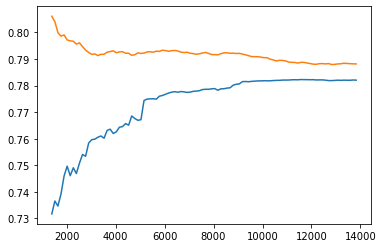

In [45]:
lr = model.fit(X_train, y_train)
train_size, train_score, val_score = learning_curve(lr, X_train, y_train,train_sizes=np.linspace(0.1,1,100), cv=5,
                                                    shuffle=True, scoring='r2')
plt.plot(train_size, val_score.mean(axis=1), label="Validation")
plt.plot(train_size, train_score.mean(axis=1), label="train")